In [1]:
#Step 1: Choose a Classification Dataset & Normalize Features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Accuracy: 1.0


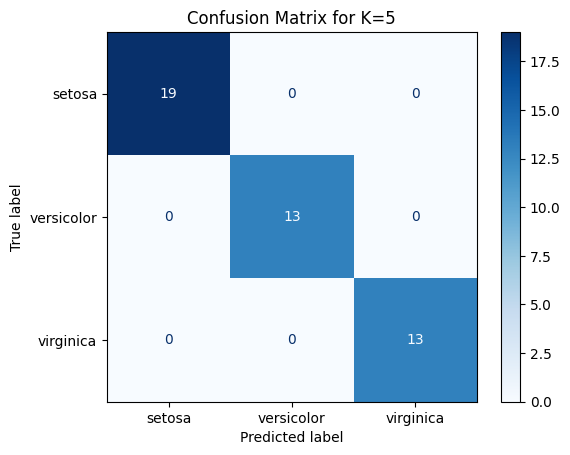

In [2]:
#Step 2: Use KNeighborsClassifier from Sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize model with default K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for K=5")
plt.show()



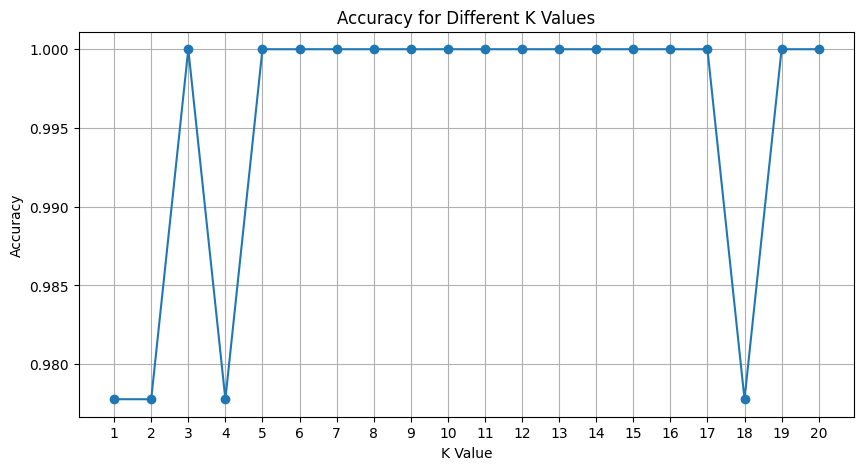

In [3]:
#Step 3: Experiment with Different Values of K
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

# Plot Accuracy vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xticks(k_values)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different K Values')
plt.grid(True)
plt.show()



Best K: 3 with Accuracy: 1.0


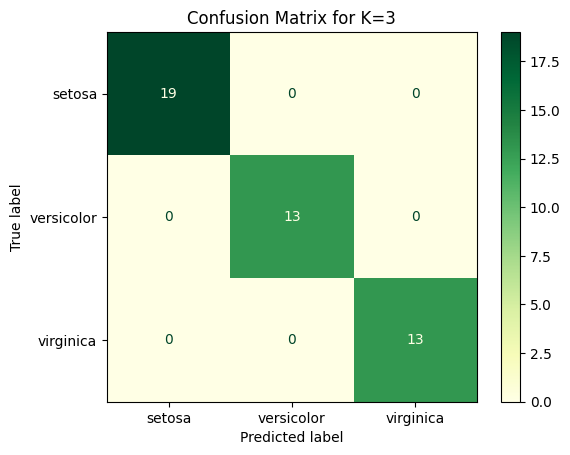

In [4]:
#Step 4: Evaluate Model using Accuracy & Confusion Matrix
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k} with Accuracy: {max(accuracies)}")

# Final Model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_final = best_knn.predict(X_test)

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_final)
disp_final = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=target_names)
disp_final.plot(cmap='YlGn')
plt.title(f"Confusion Matrix for K={best_k}")
plt.show()


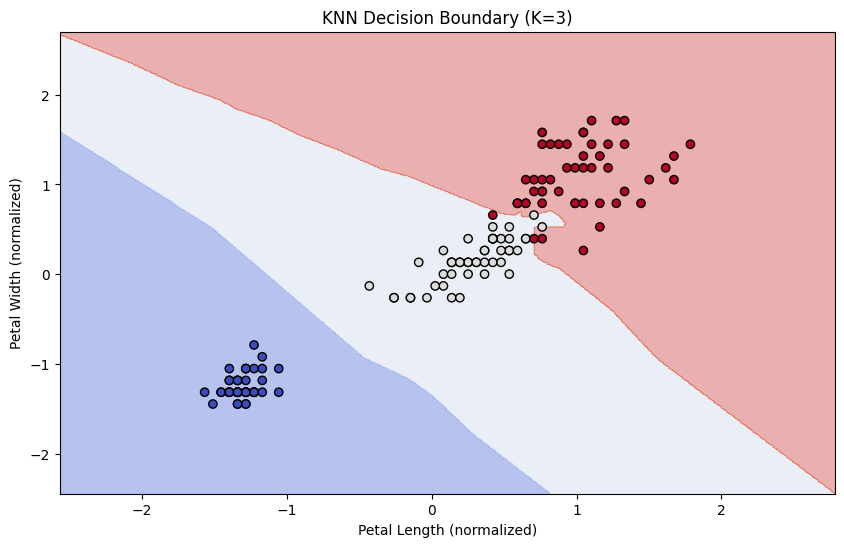

In [5]:
#Step 5: Visualize Decision Boundaries
# Select two features for 2D plotting
X_vis = iris.data[:, [2, 3]]
y_vis = iris.target

# Normalize
X_vis_scaled = StandardScaler().fit_transform(X_vis)

# Train on 2D data
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis_scaled, y_vis)

# Create meshgrid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Petal Length (normalized)')
plt.ylabel('Petal Width (normalized)')
plt.title(f'KNN Decision Boundary (K={best_k})')
plt.show()

